## Gérérer les variables

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Nombre de bâtiments
n = 25  # Choisir un nombre aléatoire de bâtiments entre 5 et 15

# Générer des positions aléatoires pour chaque bâtiment
building_positions = set()
while len(building_positions) < n:
    x = random.uniform(0, 50)
    y = random.uniform(0, 100)
    building_positions.add((x, y))

# Convertir en liste pour faciliter l'accès
building_positions = list(building_positions)

# Générer une population aléatoire pour chaque bâtiment
populations = [random.randint(100, 500) for _ in range(n)]

building_positions, populations

([(33.55647857742683, 7.705328280769297),
  (32.97047014704053, 71.26199503279909),
  (49.84071493596588, 41.68044043495206),
  (2.2873809874999207, 10.309966338088728),
  (43.72475423287149, 84.6979629851272),
  (42.35735236755616, 5.742605632338216),
  (23.305133174212166, 97.00285490291516),
  (48.57795497584887, 23.091431969937858),
  (42.31691233413296, 16.022962762449456),
  (27.59007197849292, 62.208790917068825),
  (36.9065877299186, 65.36188635844212),
  (12.61974097809151, 0.37702131116235105),
  (12.785747680439124, 61.6100951830588),
  (29.44562997980563, 28.921752397553057),
  (6.779480441176178, 42.0202873148096),
  (17.642659253547354, 3.3243653574928644),
  (5.065399487484262, 92.25134261201224),
  (29.630385016903837, 20.54846427546866),
  (0.08608752006576958, 56.8036422354298),
  (48.150249392936864, 38.91797609321347),
  (46.38518378500476, 77.3058695756612),
  (43.907933773311164, 15.032516049736365),
  (45.529771889528845, 12.736622116816065),
  (34.33209992455583

In [12]:

n_anti_buildings = 3  

anti_building_positions = set()
while len(anti_building_positions) < n_anti_buildings:
    x = random.uniform(0, 50)
    y = random.uniform(0, 100)

    if (x, y) not in building_positions:
        anti_building_positions.add((x, y))

anti_building_positions = list(anti_building_positions)

def euclidean_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Modification de la fonction de coût pour inclure les anti-bâtiments
def modified_cost_function(antenna_position, building_positions = building_positions, populations = populations, anti_building_positions = anti_building_positions):
    a, b = antenna_position
    total_cost = 0
    # Ajout du coût pour chaque bâtiment
    for (x, y), k in zip(building_positions, populations):
        distance = euclidean_distance(x, y, a, b)
        total_cost += k * distance
    # Soustraction du coût pour chaque anti-bâtiment
    for (x, y) in anti_building_positions:
        distance = euclidean_distance(x, y, a, b)
        total_cost -= distance  # On suppose ici un effet négatif unitaire pour simplifier
    return total_cost




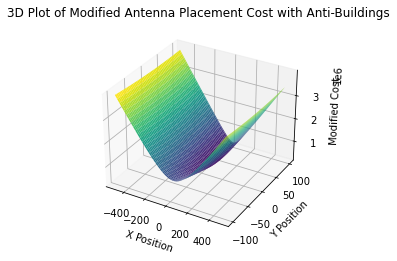

In [13]:

x = np.linspace(-500, 500, 100)
y = np.linspace(-100, 100, 100)
x, y = np.meshgrid(x, y)


costs_with_anti_buildings = np.array([[modified_cost_function((xi, yi), building_positions, populations, anti_building_positions) 
                                       for xi, yi in zip(x_row, y_row)] 
                                      for x_row, y_row in zip(x, y)])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(x, y, costs_with_anti_buildings, cmap='viridis')

ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('Modified Cost')
ax.set_title('3D Plot of Modified Antenna Placement Cost with Anti-Buildings')

plt.show()


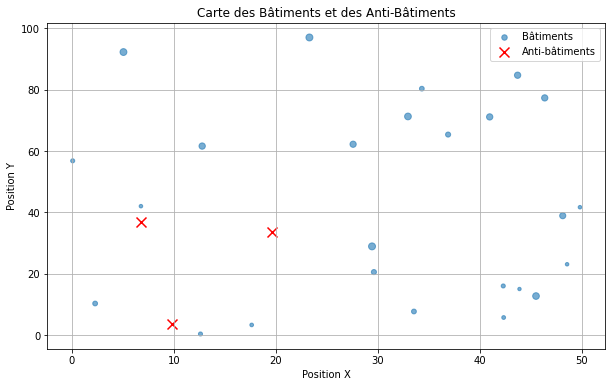

In [14]:
# Création d'un graphique représentant la position des bâtiments et des anti-bâtiments

plt.figure(figsize=(10, 6))

# Bâtiments
plt.scatter(*zip(*building_positions), s=[p / 10 for p in populations], label='Bâtiments', alpha=0.6)

# Anti-bâtiments
plt.scatter(*zip(*anti_building_positions), s=100, marker='x', color='red', label='Anti-bâtiments')

plt.xlabel('Position X')
plt.ylabel('Position Y')
plt.title('Carte des Bâtiments et des Anti-Bâtiments')
plt.legend()
plt.grid(True)
plt.show()
